<a href="https://colab.research.google.com/github/Ahmedhany587/DataScienceProjects/blob/main/Clusterning_online_shoppers%E2%80%99_intentions_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install df2onehot
!pip install clusteval

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9657 sha256=e0f1f66a04e844cdc2f07cd446100297587b0f7413c672f6d21a361058d382cf
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 kB 1.9 MB/s eta 0:00:00


In [1]:
# Import libraries
from clusteval import clusteval
from df2onehot import df2onehot

# Load data from UCI
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00468/online_shoppers_intention.csv'

In [3]:
# Initialize clusteval
ce = clusteval()
# Import data from url
df = ce.import_example(url=url)
df.head()

[clusteval] >INFO> Import dataset [online_shoppers_intention.csv]


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [5]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [6]:
# Preprocessing
cols_as_float = ['ProductRelated', 'Administrative']
df[cols_as_float]=df[cols_as_float].astype(float)
dfhot = df2onehot(df, excl_background=['0.0', 'None', '?', 'False'], y_min=50, perc_min_num=0.8, remove_mutual_exclusive=True, verbose=4)['onehot']


[df2onehot] >Auto detecting dtypes.
[df2onehot] >[Administrative]          > [float] > [num] [27]
[df2onehot] >[Administrative_Duration] > [float] > [num] [3335]
[df2onehot] >[Informational]           > [int]   > [cat] [17]
[df2onehot] >[Informational_Duration]  > [float] > [num] [1258]
[df2onehot] >[ProductRelated]          > [float] > [num] [311]
[df2onehot] >[ProductRelated_Duration] > [float] > [num] [9551]
[df2onehot] >[BounceRates]             > [float] > [num] [1872]
[df2onehot] >[ExitRates]               > [float] > [num] [4777]
[df2onehot] >[PageValues]              > [float] > [num] [2704]
[df2onehot] >[SpecialDay]              > [float] > [num] [6]
[df2onehot] >[Month]                   > [obj]   > [cat] [10]
[df2onehot] >[OperatingSystems]        > [int]   > [cat] [8]
[df2onehot] >[Browser]                 > [int]   > [cat] [13]
[df2onehot] >[Region]                  > [int]   > [cat] [9]
[df2onehot] >[TrafficType]             > [int]   > [cat] [20]
[df2onehot] >[VisitorTy

In [12]:
dfhot.shape

(12330, 55)

In [7]:
# Initialize using the specific parameters
ce = clusteval(evaluate='silhouette',
               cluster='agglomerative',
               metric='hamming',
               linkage='complete',
               min_clust=2,
               verbose='info')

# Clustering and evaluation
results = ce.fit(dfhot)

[clusteval] >INFO> Saving data in memory.
[clusteval] >INFO> Fit with method=[agglomerative], metric=[hamming], linkage=[complete]
[clusteval] >INFO> Evaluate using silhouette.
[clusteval] >INFO: 100%|██████████| 23/23 [00:36<00:00,  1.59s/it]
[clusteval] >INFO> Compute dendrogram threshold.
[clusteval] >INFO> Optimal number clusters detected: [8].
[clusteval] >INFO> Fin.


***Clusters 0, 2, 3, and 5 imply to be well-separated clusters. A Silhouette score close to 0 indicates overlapping clusters or that the data points are equally similar to their own cluster and neighboring clusters. A score close to -1 suggests that data points are more similar to points in neighboring clusters than to their own cluster.***

[clusteval] >INFO> Retrieving input data set.
[clusteval] >INFO> Compute t-SNE embedding.
[clusteval] >INFO> Estimated number of n_clusters: 8, average silhouette_score=0.035


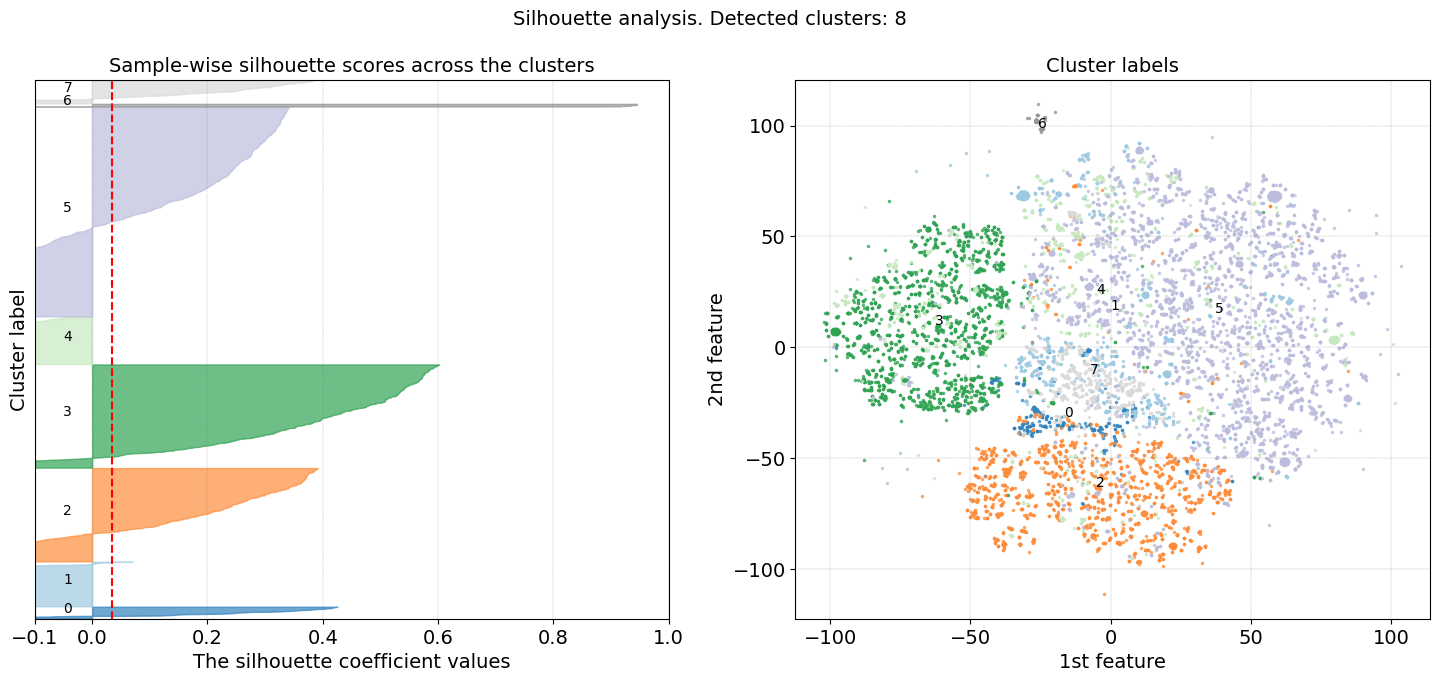

(<Figure size 1800x700 with 2 Axes>,
 <Axes: title={'center': 'Sample-wise silhouette scores across the clusters'}, xlabel='The silhouette coefficient values', ylabel='Cluster label'>,
 <Axes: title={'center': 'Cluster labels'}, xlabel='1st feature', ylabel='2nd feature'>)

In [13]:
# Plot the Silhouette and show the scatterplot using tSNE
ce.plot_silhouette(embedding='tsne')

In [15]:
#we can also do the embedding first and then cluster the data on the low-dimensional space

# Initialize library
from sklearn.manifold import TSNE
xycoord = TSNE(n_components=2, init='random', perplexity=30).fit_transform(dfhot.values)

In [16]:
# Initialize clusteval
ce = clusteval(cluster='agglomerative', metric='euclidean', linkage='complete', min_clust=5, max_clust=30)

In [17]:
# Clustering and evaluation
results = ce.fit(xycoord)

[clusteval] >INFO> Saving data in memory.
[clusteval] >INFO> Fit with method=[agglomerative], metric=[euclidean], linkage=[complete]
[clusteval] >INFO> Evaluate using silhouette.
[clusteval] >INFO: 100%|██████████| 25/25 [00:53<00:00,  2.12s/it]
[clusteval] >INFO> Compute dendrogram threshold.
[clusteval] >INFO> Optimal number clusters detected: [5].
[clusteval] >INFO> Fin.


**Determining the number of clusters (The Higher The Better)**

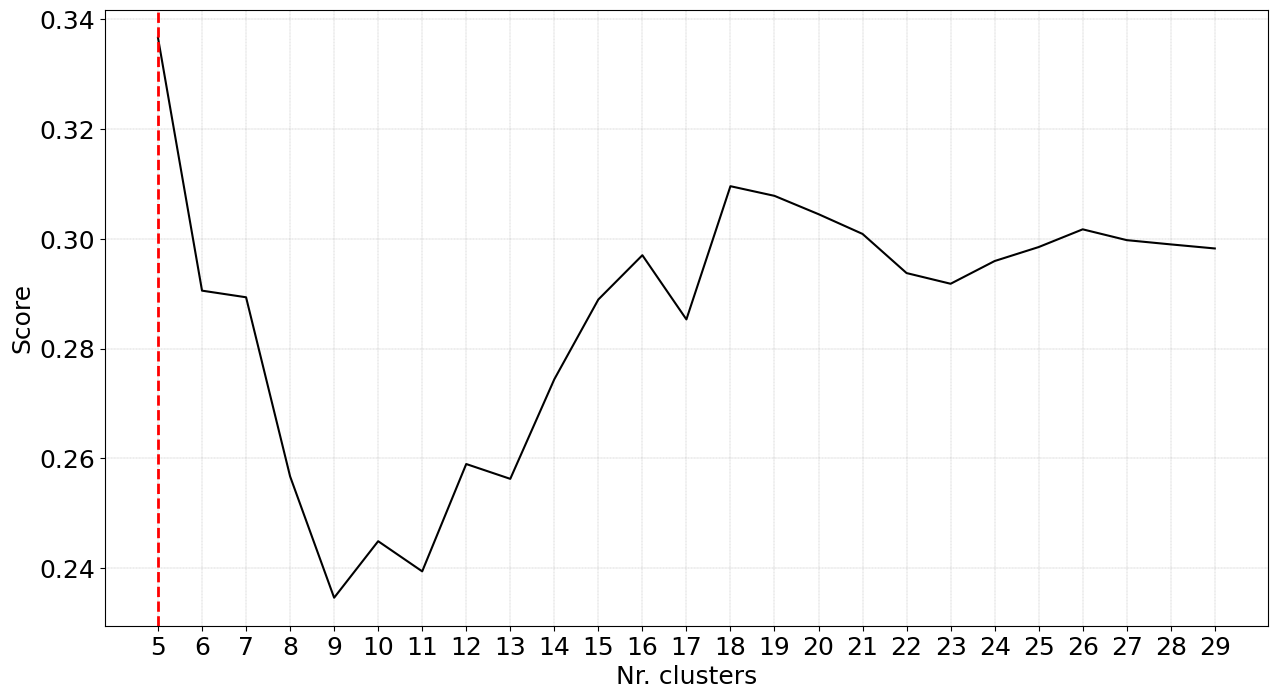

(<Figure size 1500x800 with 1 Axes>,
 <Axes: xlabel='Nr. clusters', ylabel='Score'>)

In [18]:
# Make plots
ce.plot()

**The Silhouette plot now shows better results than previously, indicating that clusters are better separated**

[clusteval] >INFO> Retrieving input data set.
[clusteval] >INFO> Coordinates (x, y) are set based on the first two features.
[clusteval] >INFO> Estimated number of n_clusters: 5, average silhouette_score=0.337


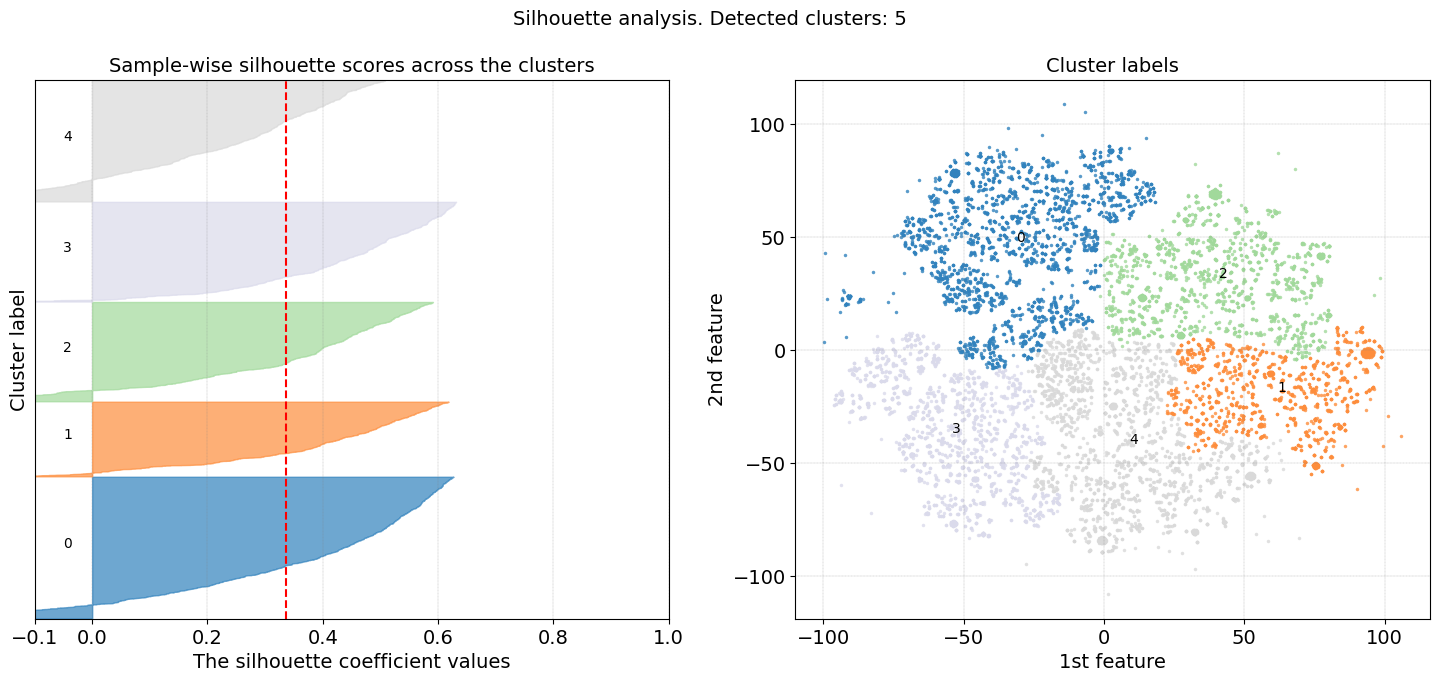

(<Figure size 1800x700 with 2 Axes>,
 <Axes: title={'center': 'Sample-wise silhouette scores across the clusters'}, xlabel='The silhouette coefficient values', ylabel='Cluster label'>,
 <Axes: title={'center': 'Cluster labels'}, xlabel='1st feature', ylabel='2nd feature'>)

In [19]:
ce.plot_silhouette()

**Detect the Driving Features Behind the Cluster Labels.**

In [22]:
!pip install hnet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.6/240.6 kB 12.2 MB/s eta 0:00:00
  Created wheel for sklearn: filename=sklearn-0.0.post5-py3-none-any.whl size=2950 sha256=2b71e38b18ac7aff822ebecb4736e6774d1c95990c2b315109a39533fe55f105
  Stored in directory: /root/.cache/pip/wheels/38/1f/8d/4f812c590e074c1e928f5cec67bf5053b71f38e2648739403a
Successfully built sklearn


In [23]:
# Enrichment between the detected cluster labels and the input dataframe
enrichment_results = ce.enrichment(df)

[hnet] >Start making fit..
[hnet] >Converting boolean values..
[hnet] >Set parameter <excl_background> to: ['0.0'].

[df2onehot] >Auto detecting dtypes.


100%|██████████| 18/18 [00:00<00:00, 59.97it/s]


[df2onehot] >Set dtypes in dataframe..
[hnet] >Analyzing [num] Administrative.....
[hnet] >Analyzing [num] Administrative_Duration.....
[hnet] >Analyzing [cat] Informational.....
[hnet] >Analyzing [num] Informational_Duration.....
[hnet] >Analyzing [num] ProductRelated.....
[hnet] >Analyzing [num] ProductRelated_Duration.....
[hnet] >Analyzing [num] BounceRates.....
[hnet] >Analyzing [num] ExitRates.....
[hnet] >Analyzing [num] PageValues.....
[hnet] >Analyzing [num] SpecialDay.....
[hnet] >Analyzing [cat] Month.....
[hnet] >Analyzing [cat] OperatingSystems.....
[hnet] >Analyzing [cat] Browser.....
[hnet] >Analyzing [cat] Region.....
[hnet] >Analyzing [cat] TrafficType.....
[hnet] >Analyzing [cat] VisitorType.....
[hnet] >Analyzing [cat] Weekend.....
[hnet] >Analyzing [cat] Revenue.....
[hnet] >Multiple test correction using holm
[hnet] >Fin


[clusteval] >INFO> Retrieving input data set.
[clusteval] >INFO> Coordinates (x, y) are set based on the first two features.


(<Figure size 2500x1500 with 1 Axes>, <Axes: xlabel='x-axis', ylabel='y-axis'>)

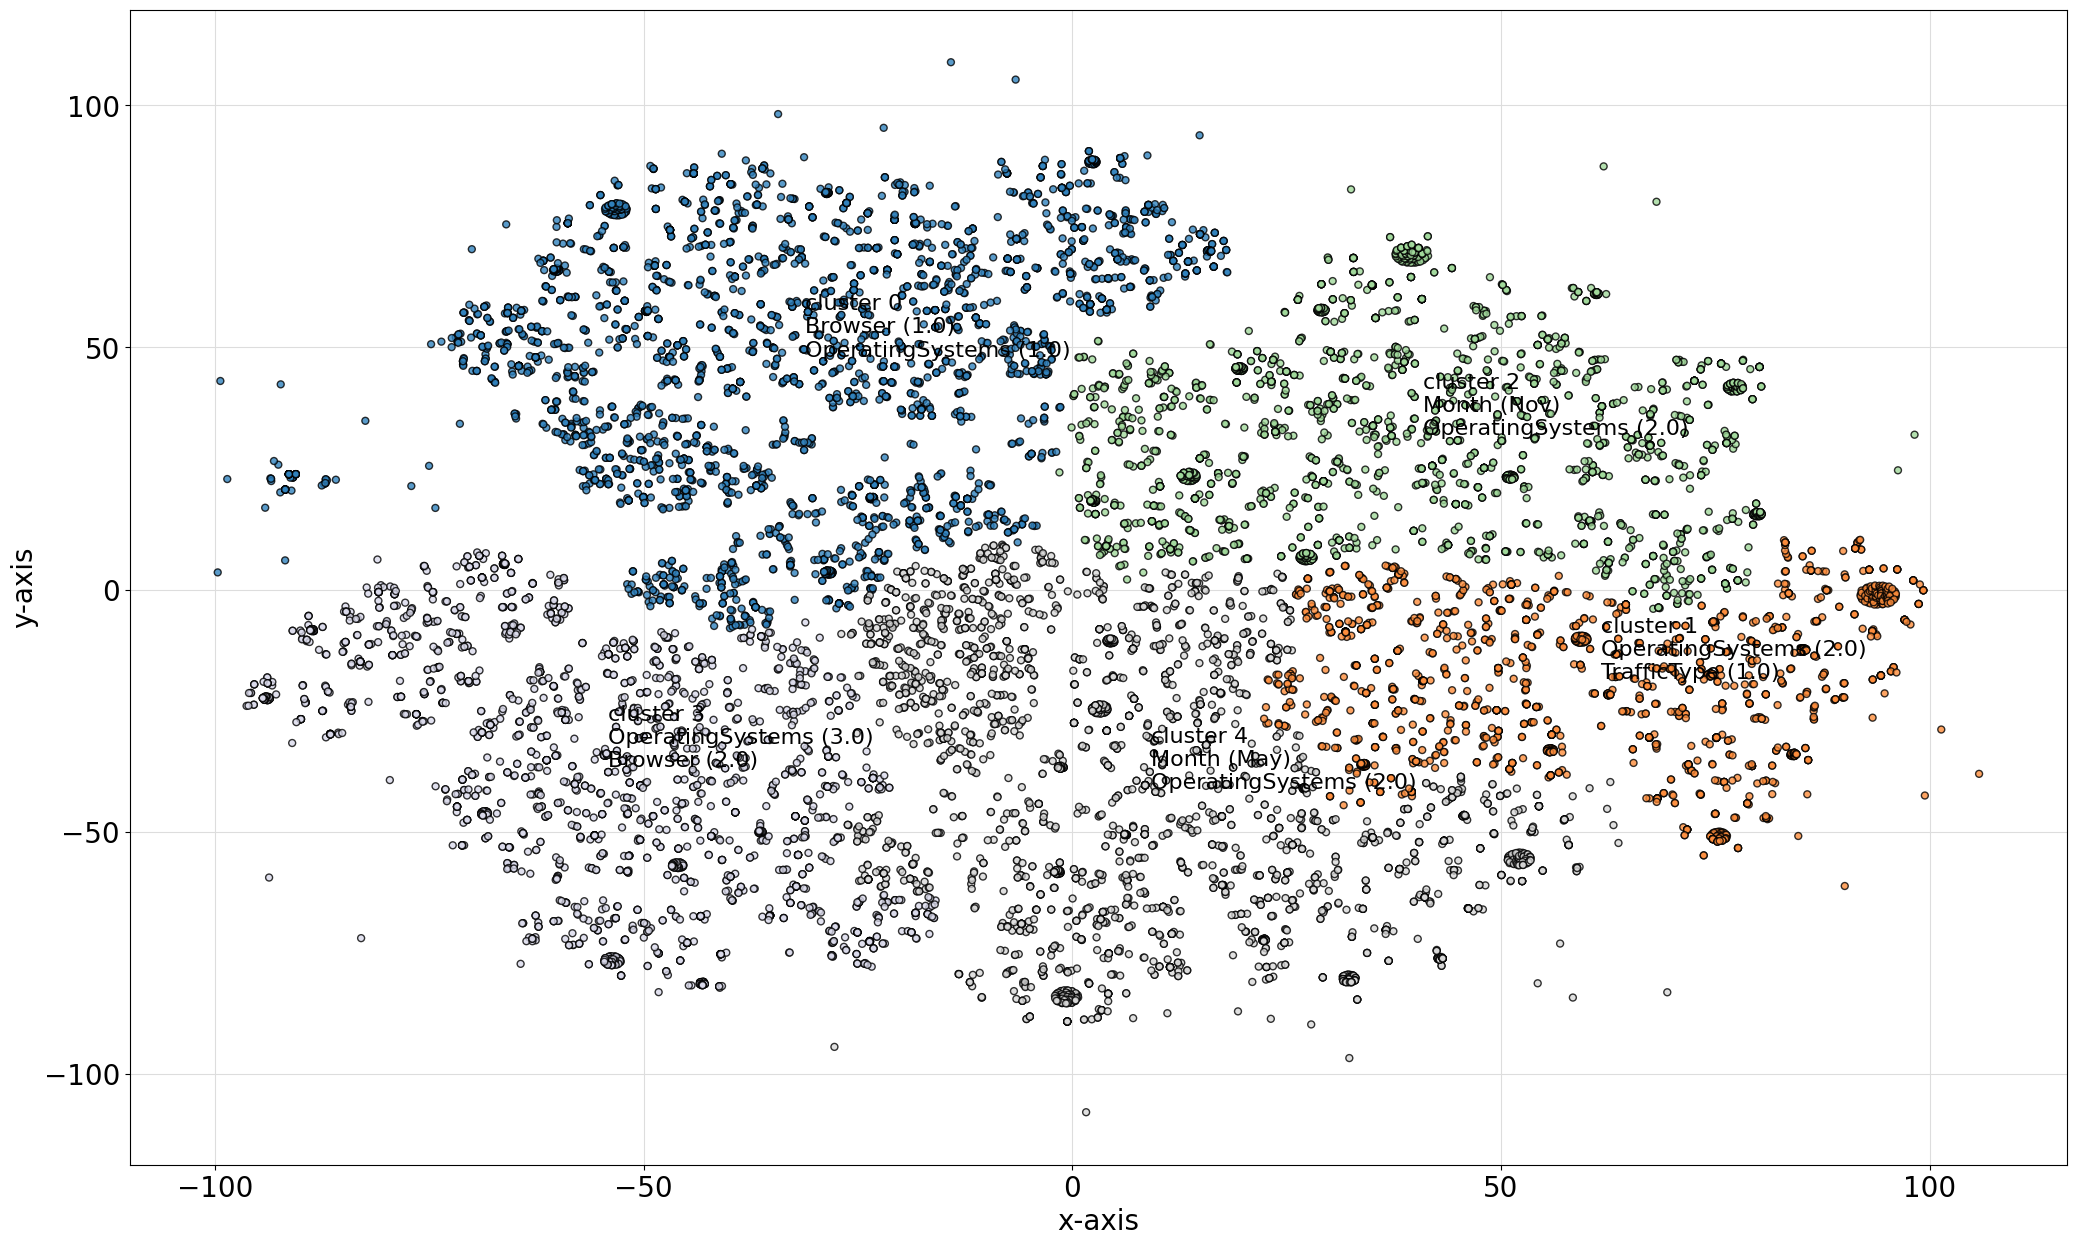

In [26]:
ce.scatter(n_feat=2)